In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
import gzip
import os

In [2]:
docword_file_base_name = 'docword.{}.txt.gz'
unzipped_docword_file_base_name = 'docword.{}.txt'
vocab_file_base_name = 'vocab.{}.txt'

def check_file_existence(path):
    found = os.path.isfile(path)
    
    if not found:
        print("File {} not found.".format(path))
    return found

def get_vocabulary_data_set(requested_dataset, \
               base_url='https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/'):
    
    for data_set in requested_dataset:
        
        # Vocabulary file.
        with urlopen(base_url + vocab_file_base_name.format(data_set)) as response:
            data = response.read()
            encoding = response.headers.get_content_charset('utf-8')
            text = data.decode(encoding).splitlines() 

    # Load the vocabulary into the dataframe.
    df = pd.DataFrame(data=text, columns=['word'])

    # Shift the index by one.
    df.index += 1

    # Rename the index column.
    df.index.name='word_id'
    
    return df    

In [3]:
# Check if the docword exists in the specific folder.

folder_name = 'docword_files/'
file_name = unzipped_docword_file_base_name.format('enron')
path = folder_name+file_name
check_file_existence(path)

True

In [4]:
requested_dataset = ['enron']

# Get the dataset.
df_vocab = get_vocabulary_data_set(requested_dataset)

In [5]:
df_vocab.head()

,word
word_id,
1,aaa
2,aaas
3,aactive
4,aadvantage
5,aaker


In [6]:
df_vocab.size

28102

In [7]:
def get_docword_data_set(data_set_name):
    folder_name = 'docword_files/'
    file_name = unzipped_docword_file_base_name.format(data_set_name)
    path = folder_name+file_name
    index = 0
    
    info = dict()
    
    if check_file_existence(path):
        print('File found')
        with open(path, 'rb') as file:
            for line in file:
                line = line.decode('utf-8').splitlines()[0]
                if index == 0:
                    info['docs_num'] = line
                elif index == 1:
                    info['words_num'] = line
                elif index == 2:
                    info['non_zero_num'] = line
                else:
                    break
                index += 1
    
    # Now load the rest of the file.
    df = pd.read_csv(path, sep=" ", header=None, skiprows=[0,1,2])
    df.columns = ["document_id", "word_id", "count"]
            
    return info, df

In [8]:
info,df_docword = get_docword_data_set('enron')

File found


In [9]:
info

{'docs_num': '39861', 'words_num': '28102', 'non_zero_num': '3710420'}

In [10]:
df_docword # // 3710420

,document_id,word_id,count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
5,1,5299,1
6,1,6941,1
7,1,7223,1
8,1,8904,1
9,1,9358,1


In [11]:
df_vocab.head()

,word
word_id,
1,aaa
2,aaas
3,aactive
4,aadvantage
5,aaker


In [12]:
merged = pd.merge(df_vocab, df_docword, left_index=True, right_on='word_id')

In [13]:
merged

,word,document_id,word_id,count
95356,aaa,1684,1,1
142343,aaa,2093,1,1
147317,aaa,2182,1,1
152649,aaa,2281,1,1
173685,aaa,2609,1,1
263217,aaa,4225,1,1
387270,aaa,5257,1,1
387511,aaa,5263,1,1
387851,aaa,5267,1,1
433995,aaa,5900,1,1


In [14]:
merged[merged['word_id'] == 5324].count()

word           180
document_id    180
word_id        180
count          180
dtype: int64

In [15]:
df_docword[df_docword['word_id'] == 5324].count()

document_id    180
word_id        180
count          180
dtype: int64

In [16]:
# merged[merged['word_id'] == 28102]
merged['count'].size

3710420

In [17]:
# df_docword[df_docword['word_id'] == 28102]
df_docword['count'].size

3710420

In [18]:
merged['count'].size - df_docword['count'].size

0

In [19]:
merged.head()

,word,document_id,word_id,count
95356,aaa,1684,1,1
142343,aaa,2093,1,1
147317,aaa,2182,1,1
152649,aaa,2281,1,1
173685,aaa,2609,1,1


Word frequency in the same document

In [20]:
prova = merged.query('document_id==2 and count>1') 

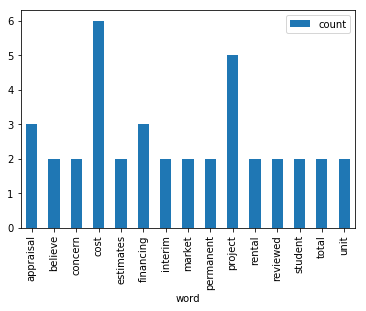

In [21]:
# plt.xticks(x='word', label=prova['word'],rotation='vertical')
prova.plot(x='word', y='count', kind='bar')

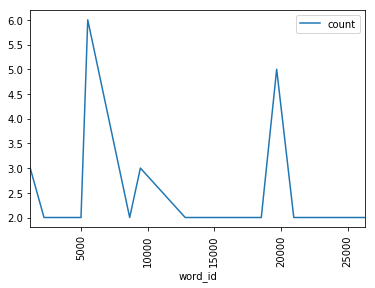

In [22]:
prova.plot(x='word_id', y='count', rot=90)

Merge all document.

In [23]:
# prova1 = merged.groupby(by=['word_id','word'], as_index=False)['count'].sum().query('count>20000').sort_values(by='count',ascending=False)
prova1 = merged.groupby(by=['word_id','word'], as_index=False)['count'].sum().sort_values(by='count',ascending=False)
# prova1[prova1.word=='aaa']

In [24]:
# prova1['word']=="aaa"

In [25]:
# prova1.plot(x='word', y='count', kind='bar')

In [26]:
def most_frequent_words(number):
    """ This method returns number rows with the most frequence among all the documents. 
    
    :param number
    """
    return merged.groupby(by=['word_id','word'], as_index=False)['count'].sum().sort_values(by='count',ascending=False).iloc[:number]

most_frequent_words(5)

,word_id,word,count
19186,19190,power,32985
4864,4865,company,32115
8241,8243,energy,28024
15228,15231,market,24910
3449,3450,california,24456


In [27]:
def least_frequent_words(number):
    """ This method returns number rows with the most frequence among all the documents. 
    
    :param number
    """
    return merged.groupby(by=['word_id','word'], as_index=False)['count'].sum().sort_values(by='count',ascending=False).iloc[-number:]

least_frequent_words(5)

,word_id,word,count
18946,18950,pm230,2
18947,18951,pm300,2
842,843,am1000,1
14922,14925,lynnout,1
16426,16430,mtgraetta,1


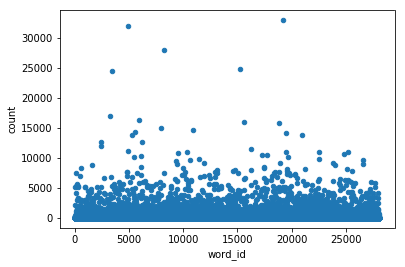

In [28]:
test = merged.groupby(by=['word_id','word'], as_index=False)['count'].sum()
test.plot(kind='scatter',x='word_id', y='count')

In [29]:
df_docword

,document_id,word_id,count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
5,1,5299,1
6,1,6941,1
7,1,7223,1
8,1,8904,1
9,1,9358,1


In [31]:
prov_df = pd.read_csv('2019-04-01.csv')

EmptyDataError: No columns to parse from file

In [ ]:
# emails_df = pd.read_csv('emails.csv')

In [ ]:
import os, sys, email,re

## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages

emails_df.head()

In [ ]:
emails_df.query('content.str.contains("aaa") and not content.str.contains("Forwarded")')['content'].count()

In [ ]:
# https://github.com/scikit-learn/scikit-learn/blob/master/doc/tutorial/text_analytics/working_with_text_data.rst

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

len(twenty_train.data)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [ ]:
print(X_train_counts)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)


In [ ]:
print(X_train_tf)